c

In [3]:
import pandas as pd
import numpy as np
import matplotlib

#reading the csv
paths_data = pd.read_csv("Paths_Data.csv") 

paths_data.head(10)

,_id,report_id,vehicle_type,vehicle_movement,plate_state,created_at_local,created_at_epoch,address,latitude,longitude
0,1,21645,Other,standing,PA,2019-10-16T08:18:48,1571228328000,"4609 Forbes Ave, Pittsburgh, PA 15213",40.444594,-79.948097
1,2,21734,Private,standing,PA,2019-10-16T17:15:58,1571260558000,"305 Wood St, Pittsburgh, PA 15222",40.438942,-80.001638
2,3,21640,Other,parked,PA,2019-10-16T08:02:54,1571227374000,"4615 Forbes Ave, Pittsburgh, PA 15213",40.444569,-79.947853
3,4,21641,Other,standing,US,2019-10-16T12:16:42,1571242602000,"30 Foster Sq, Pittsburgh, PA 15212",40.451163,-80.007302
4,5,21608,Private,Loading,PA,2019-10-16T08:16:14,1571228174000,"6 PPG Pl, Pittsburgh, PA 15222",40.439702,-80.003641
5,6,21615,Private,Loading,PA,2019-10-16T08:36:16,1571229376000,"6 PPG Pl, Pittsburgh, PA 15222",40.439727,-80.003781
6,7,21586,Private,standing,PA,2019-10-16T07:13:01,1571224381000,"230 3rd Ave, Pittsburgh, PA 15222",40.439240,-80.002425
7,8,21588,Private,Loading,GA,2019-10-16T07:18:39,1571224719000,"230 3rd Ave, Pittsburgh, PA 15222",40.439332,-80.002916
8,9,21590,Private,parked,IN,2019-10-16T07:27:16,1571225236000,"4212 Forbes Ave, Pittsburgh, PA 15213",40.443310,-79.952255
9,10,21592,Other,Loading,PA,2019-10-16T07:30:13,1571225413184,"4515 Forbes Ave, Pittsburgh, PA 15213",40.444320,-79.949267


In [4]:
#Sorting the file by address
address_sort = paths_data.sort_values("address")
address_sort.head(10)

,_id,report_id,vehicle_type,vehicle_movement,plate_state,created_at_local,created_at_epoch,address,latitude,longitude
53,54,21669,Private,parked,CA,2019-10-16T13:05:49,1571245549000,"1 PPG Pl, Pittsburgh, PA 15222",40.439840,-80.003647
93,94,21739,Other,Loading,PA,2019-10-16T17:24:01,1571261041935,"1 PPG Pl, Pittsburgh, PA 15222",40.440055,-80.003656
27,28,21634,Private,standing,PA,2019-10-16T07:17:49,1571224669000,"1 PPG Pl, Pittsburgh, PA 15222",40.439752,-80.003992
28,29,21635,Private,standing,PA,2019-10-16T08:18:43,1571228323000,"1 PPG Pl, Pittsburgh, PA 15222",40.439793,-80.004008
100,101,21751,Ridehail,Loading,PA,2019-10-16T17:32:14,1571261534404,"1 PPG Pl, Pittsburgh, PA 15222",40.440125,-80.003621
92,93,21737,Ridehail,Loading,PA,2019-10-16T17:22:53,1571260973214,"1 PPG Pl, Pittsburgh, PA 15222",40.439995,-80.003684
33,34,21646,Other,standing,PA,2019-10-16T12:26:57,1571243217000,"10 Childrens Way, Pittsburgh, PA 15212",40.452771,-80.007168
45,46,21659,Ridehail,Loading,PA,2019-10-16T12:53:37,1571244817000,"101 S Commons, Pittsburgh, PA 15212",40.450415,-80.004598
54,55,21670,Other,standing,PA,2019-10-16T13:07:16,1571245636219,"101 S Commons, Pittsburgh, PA 15212",40.450343,-80.005086
107,108,21763,Private,standing,PA,2019-10-16T17:40:38,1571262038000,"101 S Commons, Pittsburgh, PA 15212",40.450500,-80.004366


In [5]:
paths_data['zip_code'] = paths_data['address'].str.extract(r'(\b\d{5}\b)')

In [6]:
#making a count to determine which addresses have the highest blocked bike lanes
counts = paths_data['zip_code'].value_counts()
print(counts)

15222    55
15213    51
15212    15
15219     1
Name: zip_code, dtype: int64


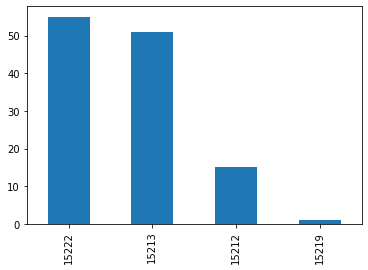

In [7]:
counts.plot.bar()

# Zip Code Neighborhoods

### 15222 = Troy Hill
### 15213 = North Oakland
### 15212 = Perry South
### 15219 = Central Business District

## Conclusion

### I was quite surprised that the Business district had such low blocked paths, as the only time I went tere it was packed. 
### But since all of this data was gathered on one day, this could be an outlier day. However the other neighborhoods were expected.  

In [50]:
traffic_data = pd.read_csv("Traffic_Data.csv") 
traffic_data.dropna(subset=['average_daily_car_traffic'], inplace=True)
grouped_data = traffic_data.groupby('neighborhood').sum()

In [56]:
average_car = grouped_data.sort_values('average_daily_car_traffic')
car_top5 = average_car.head(10)
car_top5.head()



,_id,id,device_id,record_oid,average_daily_car_traffic,average_daily_bike_traffic,speed_limit,max_speed,median_speed,percent_over_limit,speed85_percent,speed95_percent,longitude,latitude,council_district,ward,tract,public_works_division,pli_division,police_zone
neighborhood,,,,,,,,,,,,,,,,,,,,
South Side Flats,730,614417587,329,1.406278e+09,115.0,0.0,25.0,0.0,18.0,3.0,22.0,24.0,-79.981096,40.431002,3.0,17.0,42003170200,3.0,17.0,3.0
Lincoln Place,763,1844854594,337,3.703447e+07,126.0,0.0,25.0,46.0,20.0,14.0,25.0,30.0,-79.915459,40.372514,5.0,31.0,42003310200,3.0,31.0,4.0
Lincoln-Lemington-Belmar,760,592949364,334,1.764429e+09,195.0,0.0,25.0,51.0,20.0,19.0,27.0,33.0,-79.894058,40.463857,9.0,12.0,42003561900,2.0,12.0,5.0
Fineview,728,713909736,327,7.668602e+08,419.0,0.0,25.0,0.0,25.0,47.0,30.0,34.0,-80.009285,40.465203,6.0,26.0,42003261400,1.0,26.0,1.0
Allegheny West,206,2137013195,221,2.090544e+09,477.0,0.0,25.0,0.0,20.0,11.0,24.0,28.0,-80.016819,40.452706,1.0,22.0,42003562700,1.0,22.0,1.0


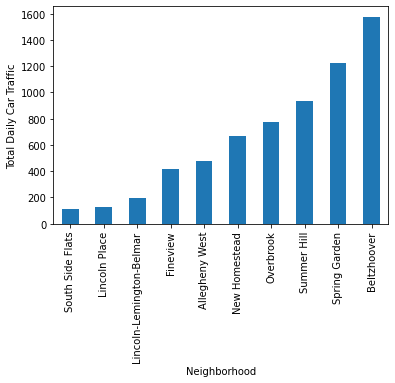

In [60]:
import matplotlib.pyplot as plt
car_top5.reset_index(inplace=True)  # Resetting the index for plotting

# Plotting the bar graph
car_top5.plot(x='neighborhood', y='average_daily_car_traffic', kind='bar', rot=90, legend=False)

# Labeling the axes
plt.xlabel('Neighborhood')
plt.ylabel('Total Daily Car Traffic')

# Displaying the plot
plt.show()